# Optimization in ML

In this notebook we will brieflly look on approaches in optimization tasks solvers.

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 3D pictures
from mpl_toolkits.mplot3d import Axes3D

Prepare data for further optimization task solution.

In [4]:
def load_data(path, **kwargs):
    if not os.path.exists(path):
        raise Exception('path: {0} doesn\'t exists'.format(path))
    return pd.read_csv(path, **kwargs)

In [37]:
df = load_data(path, index_col = 'Index')
df.head(3)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269


1. Chose **loss function** for task

This is one of the most important steps, because on the loss function type depends further approach of optimization. 

For example, this does not make sence trying to find minimum of loss function without gradient with Stochastic gradients. It is better to use genetic algorithms.

More about loss functions: [here](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

In [38]:
def error(w0, w1):
    return np.sum(
        (df.Height.values - (w0 + w1 * df.Weight.values))**2
    )

2. In 3D case it is possible to draw eror surface for better understanding.

Below we use $L2$ loss function.

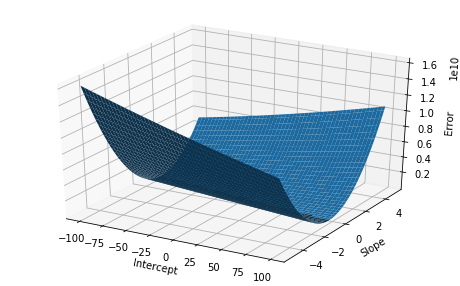

In [39]:
fig = plt.figure(figsize=(8, 5))
ax = fig.gca(projection='3d')

W0 = np.arange(-100, 100, 1)
W1 = np.arange(-5, 5, 0.1)

W0, W1 = np.meshgrid(W0, W1)
E = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        E[i,j]=error(W0[i, j], W1[i, j])

surf = ax.plot_surface(W0, W1, E)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

### First approach to optimization.

Optimization with [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [40]:
from scipy.optimize import minimize

error_fun = lambda w: np.sum((df.Height.values - (w[0] + w[1] * df.Weight.values))**2)
res = minimize(fun=error_fun, x0=(0., 0.), bounds=((-100., 100.), (-5., 5.)), method='L-BFGS-B')
res.x

array([57.57179162,  0.08200637])

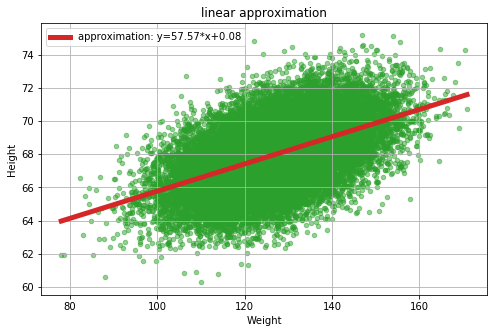

In [43]:
x = np.array([np.min(df.Weight), np.max(df.Weight)])

fig, ax = plt.subplots(figsize=(8, 5))
df.plot.scatter(x='Weight', y='Height', ax=ax, color='C2', alpha=0.5, title='linear approximation')
ax.plot(x, res.x[0] + res.x[1] * x, 
        lw=5, color='C3', label = 'approximation: y={0}*x+{1}'.format(round(res.x[0],2), round(res.x[1], 2))
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.grid(True)
plt.show()

Optimization with torch

In [46]:
import torch

# for _ in range(500):
#     fun = (weights[0] + df.Weight.values * weights[1] - df.Height.values)
